<a href="https://www.kaggle.com/code/faressayah/analysis-of-airbnb-data-new-york-city?scriptVersionId=117770062" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# New York City Airbnb Open Data
#### Airbnb listings and metrics in NYC, NY, USA (2019)
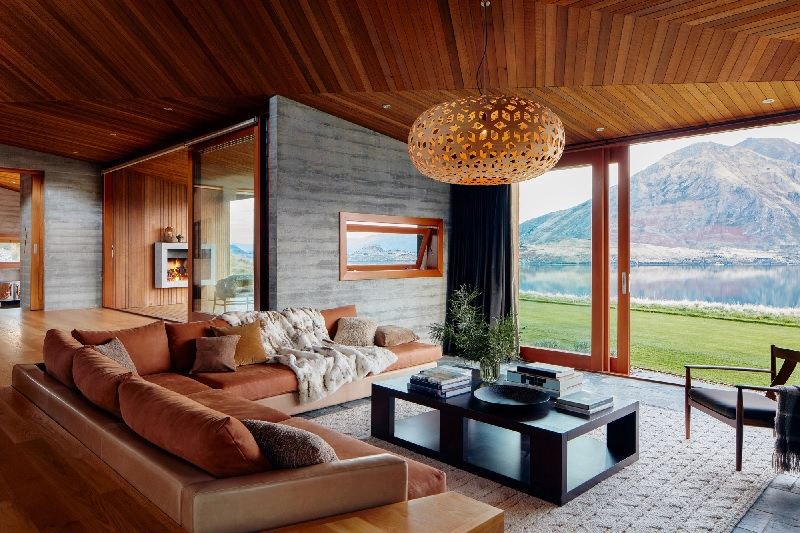

Airbnb is a paid community platform for renting and booking private accommodation founded in 2008. Airbnb allows individuals to rent all or part of their own home as extra accommodation. The site offers a search and booking platform between the person offering their accommodation and the vacationer who wishes to rent it. It covers more than 1.5 million advertisements in more than 34,000 cities and 191 countries. From creation, inaugust 2008, until June 2012, more than 10 million nights have been booked on Airbnb.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Loading the data

In [2]:
df = pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
# df.index.name = None
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# 1. Exploratory Data Analysis (EDA)

EDA allows us to:

- **Better understand the data:** Getting domain knowledge by reading some articles about the topic you are working on. You don't need to go to deep.
- **Build intuition about the data:** Check if the data agree with the our domain knowledge.
- **Generate hypotheses:** Understand how the data was generated, Find insights, and try to predict the output.
- **Exploring anonymized data:** Explore individual features, check if the values match with our domain knowledge. Explore features relations.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Checking for missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")

name ==> Missing Values : 16, dtypes : object
host_name ==> Missing Values : 21, dtypes : object
last_review ==> Missing Values : 10052, dtypes : object
reviews_per_month ==> Missing Values : 10052, dtypes : float64


For the `float` dtypes we are going to fill the missing values by `mean()`, for `object` we are going to fill missing values by `mode()`. `last_review` is a date, so we need to convert it, then fill missing values from previous values.

In [6]:
df["last_review"] = pd.to_datetime(df.last_review)

In [7]:
df.last_review.isnull().sum()

10052

In [8]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,1.373221,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaT,1.373221,1,23


In [9]:
df.last_review.fillna(method="ffill", inplace=True)

In [10]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")

name ==> Missing Values : 16, dtypes : object
host_name ==> Missing Values : 21, dtypes : object


In [11]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        df[column] = df[column].fillna(df[column].mode()[0])

In [12]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,19017143.24,67620010.65,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,78610967.03,0.05,0.05,240.15,20.51,44.55,1.50,32.95,131.62
min,2539.00,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9471945.00,7822033.00,40.69,-73.98,69.00,1.00,1.00,0.28,1.00,0.00
50%,19677284.00,30793816.00,40.72,-73.96,106.00,3.00,5.00,1.22,1.00,45.00
75%,29152178.50,107434423.00,40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


In [14]:
categorical_col = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        print("===============================================================================")
        print(f"{column} : {df[column].unique()}")
        categorical_col.append(column)

neighbourhood_group : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
room_type : ['Private room' 'Entire home/apt' 'Shared room']


In [15]:
# Drop ["id", "host_name"] because it is insignificant and also for ethical reasons.
df.drop(["id", "host_name"], axis="columns", inplace=True)
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,2019-05-21,1.37,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
df.last_review.isnull().sum()

0

# 2. Data Visualization

- Visualize your data and search for pattern that can help you solve your problem.
- Correlation analysis helps us to see features relatations.

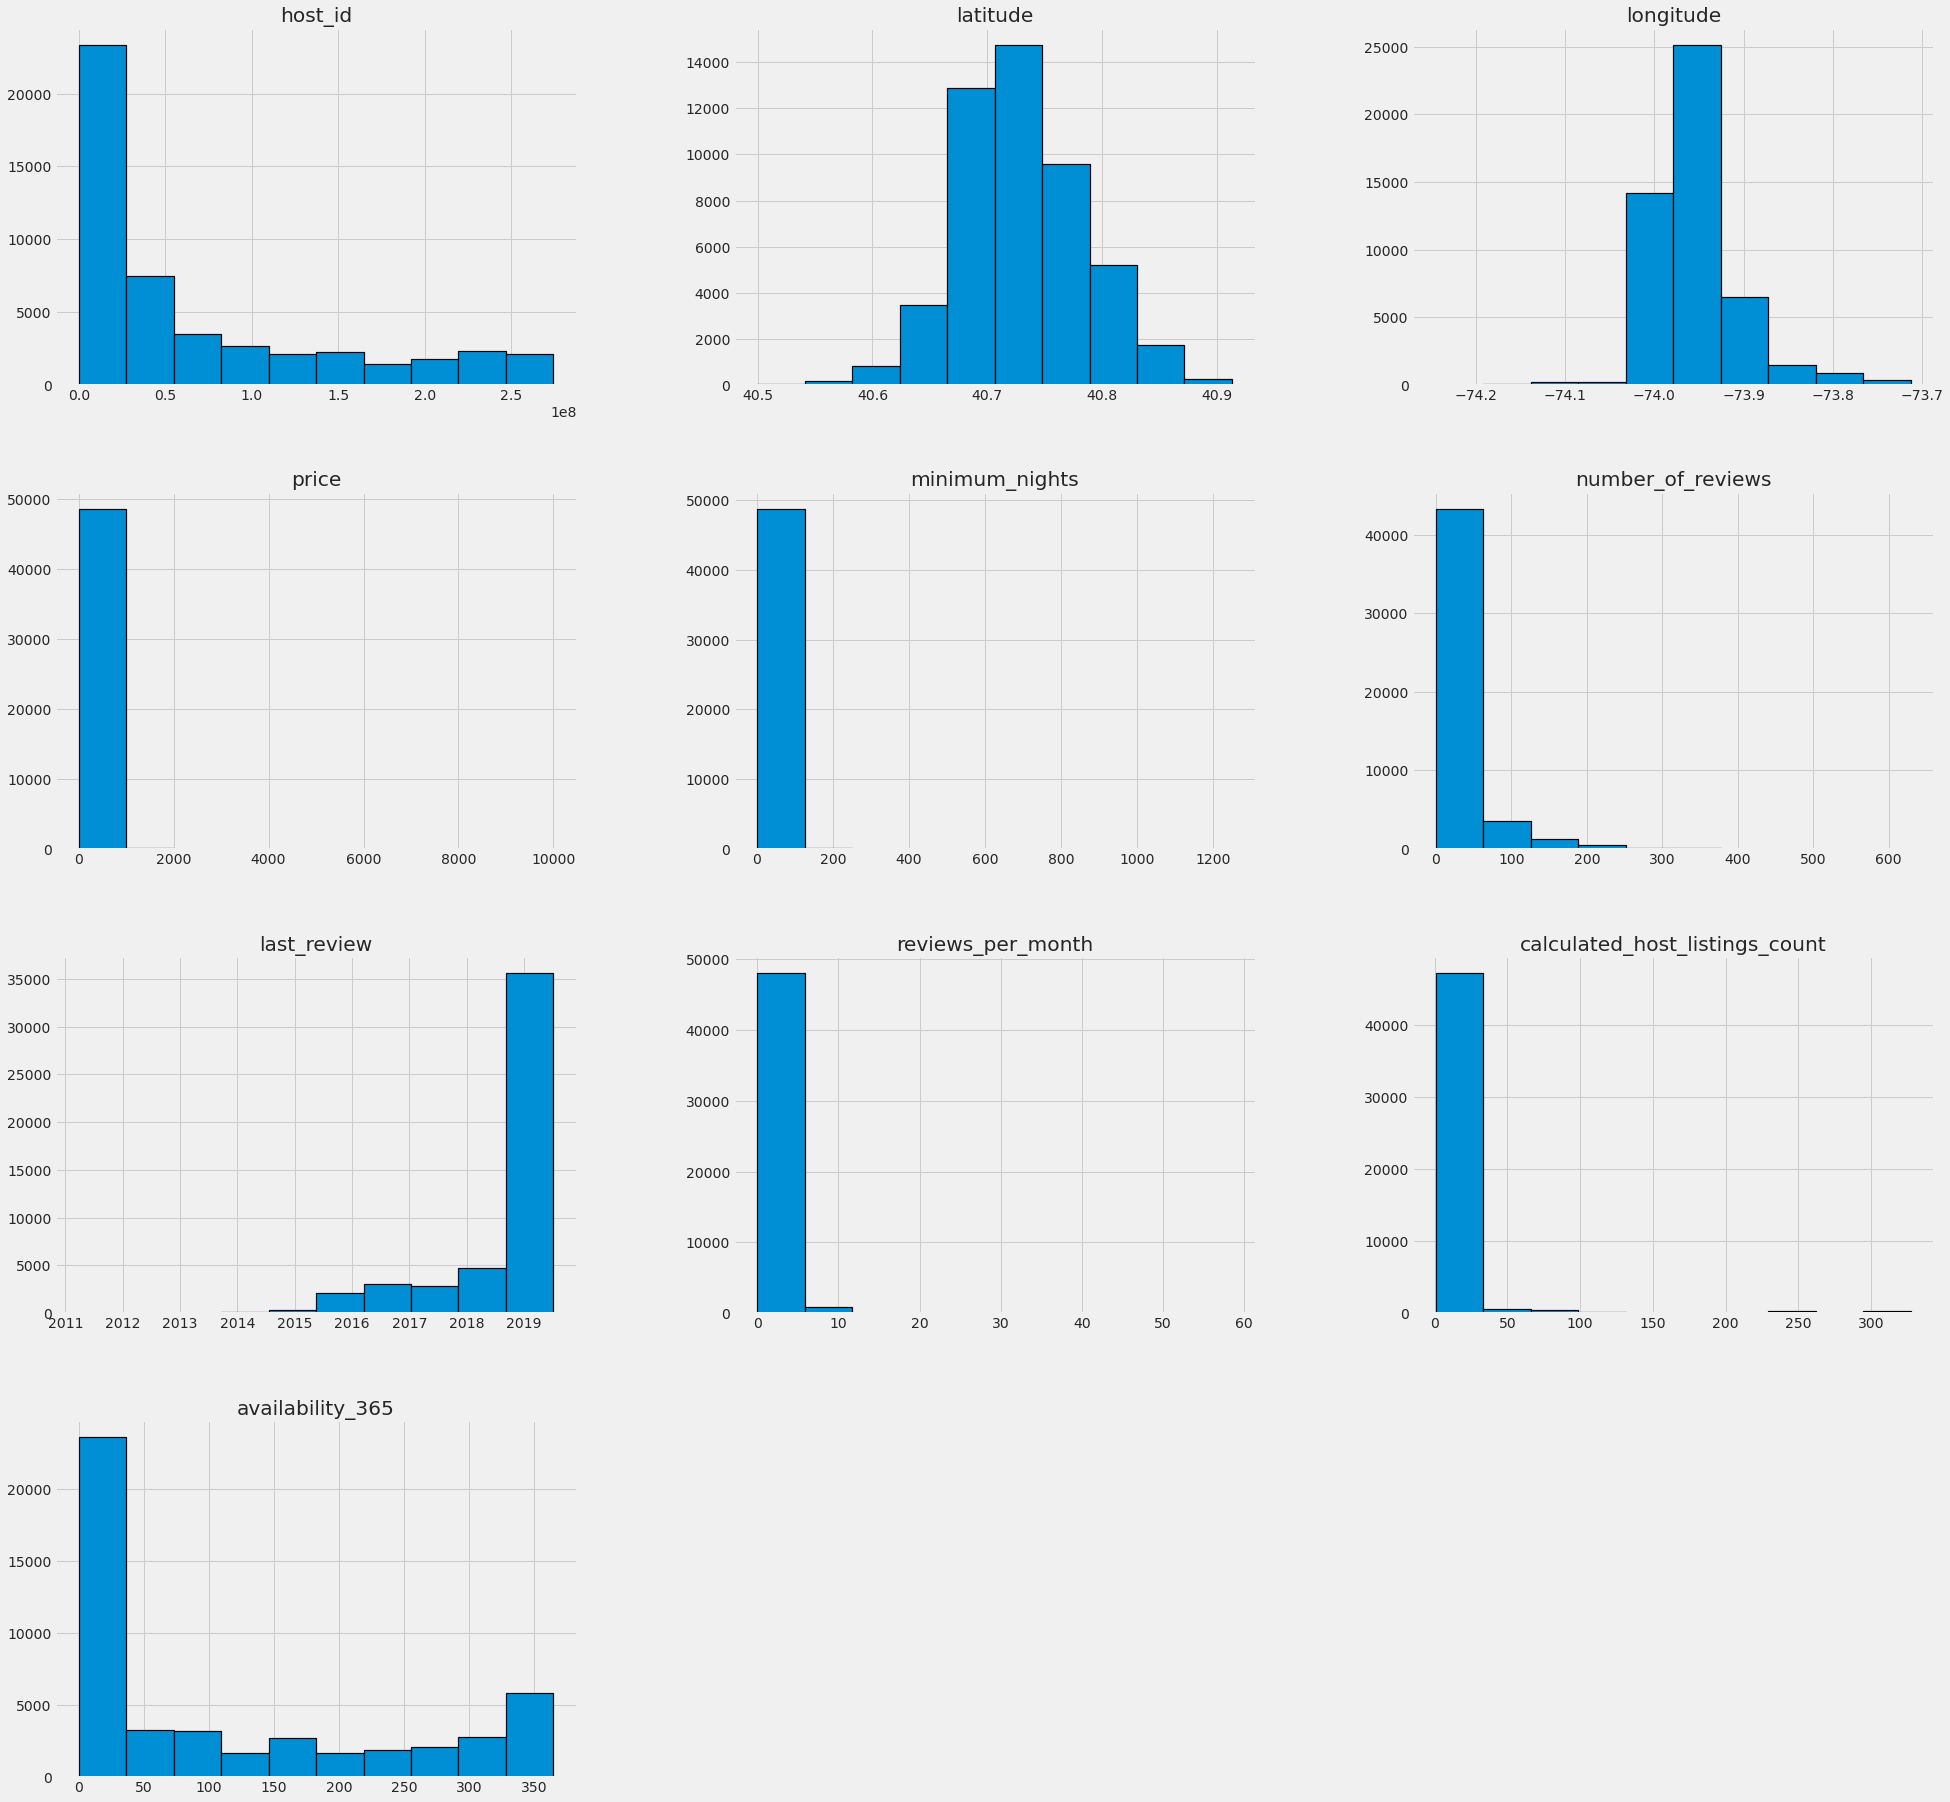

In [17]:
# Visualizing the distribution for every "feature"
df.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

<Figure size 2160x2160 with 0 Axes>

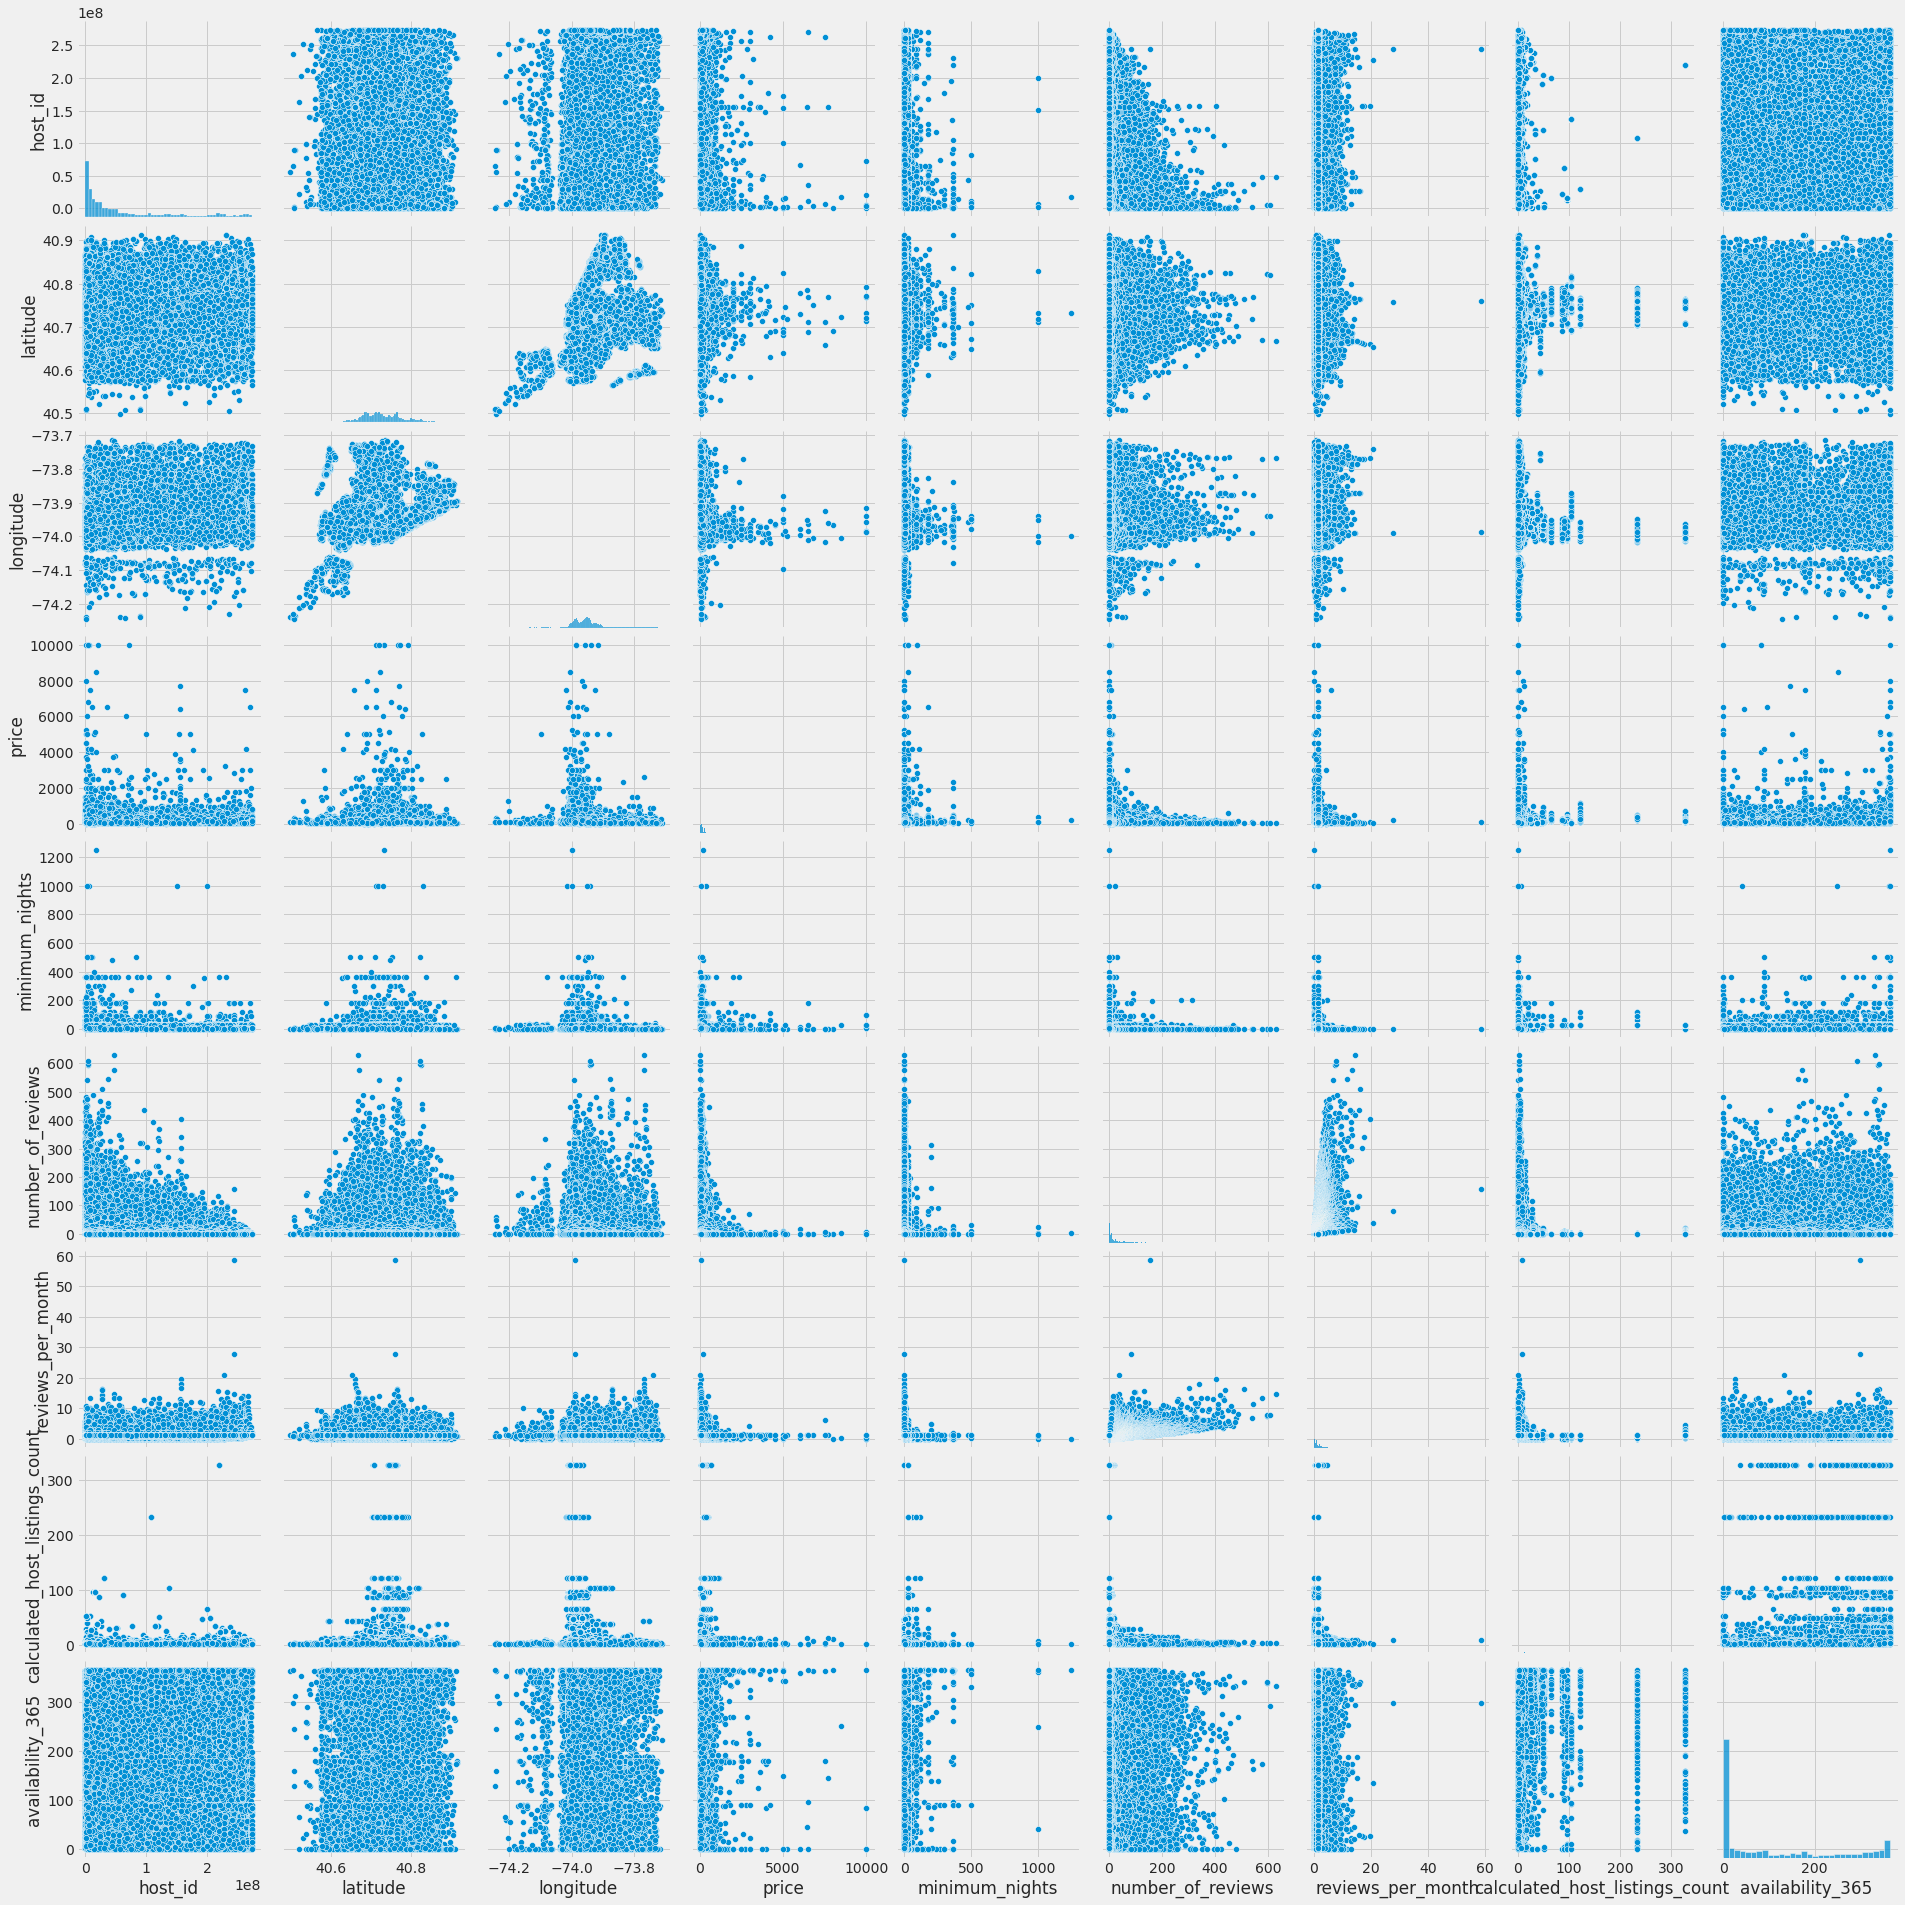

In [18]:
plt.figure(figsize=(30, 30))
sns.pairplot(df, height=3, diag_kind="hist")

**We notice from the graphs that :**
- `latitude` and `longitude` have a normal distribution, most of the hosts are concetrated in specific area.
- `reviews_per_month` has a lot of outlayers, because of the missing values filled by `mean()` and `mode()`
- `availability_365` the most of the hosts are not available all the year.
- `price` most the host has a price under $1000 

In [19]:
col = list(df.columns)
col.remove("latitude")
col.remove("longitude")

In [20]:
print(col)

['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [21]:
categorical_col

['neighbourhood_group', 'room_type']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


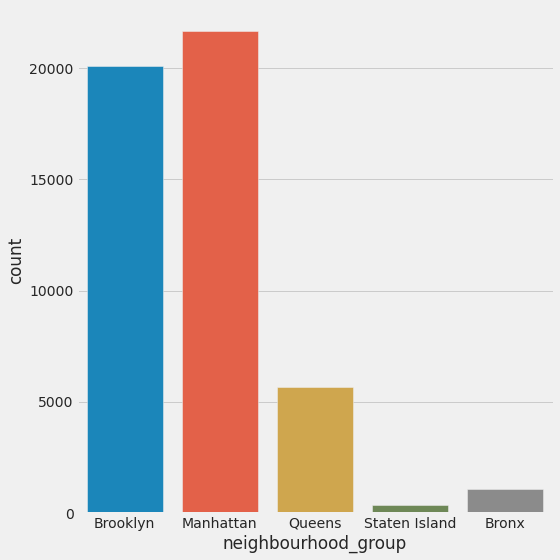

In [22]:
sns.catplot("neighbourhood_group", data=df, kind="count", height=8)

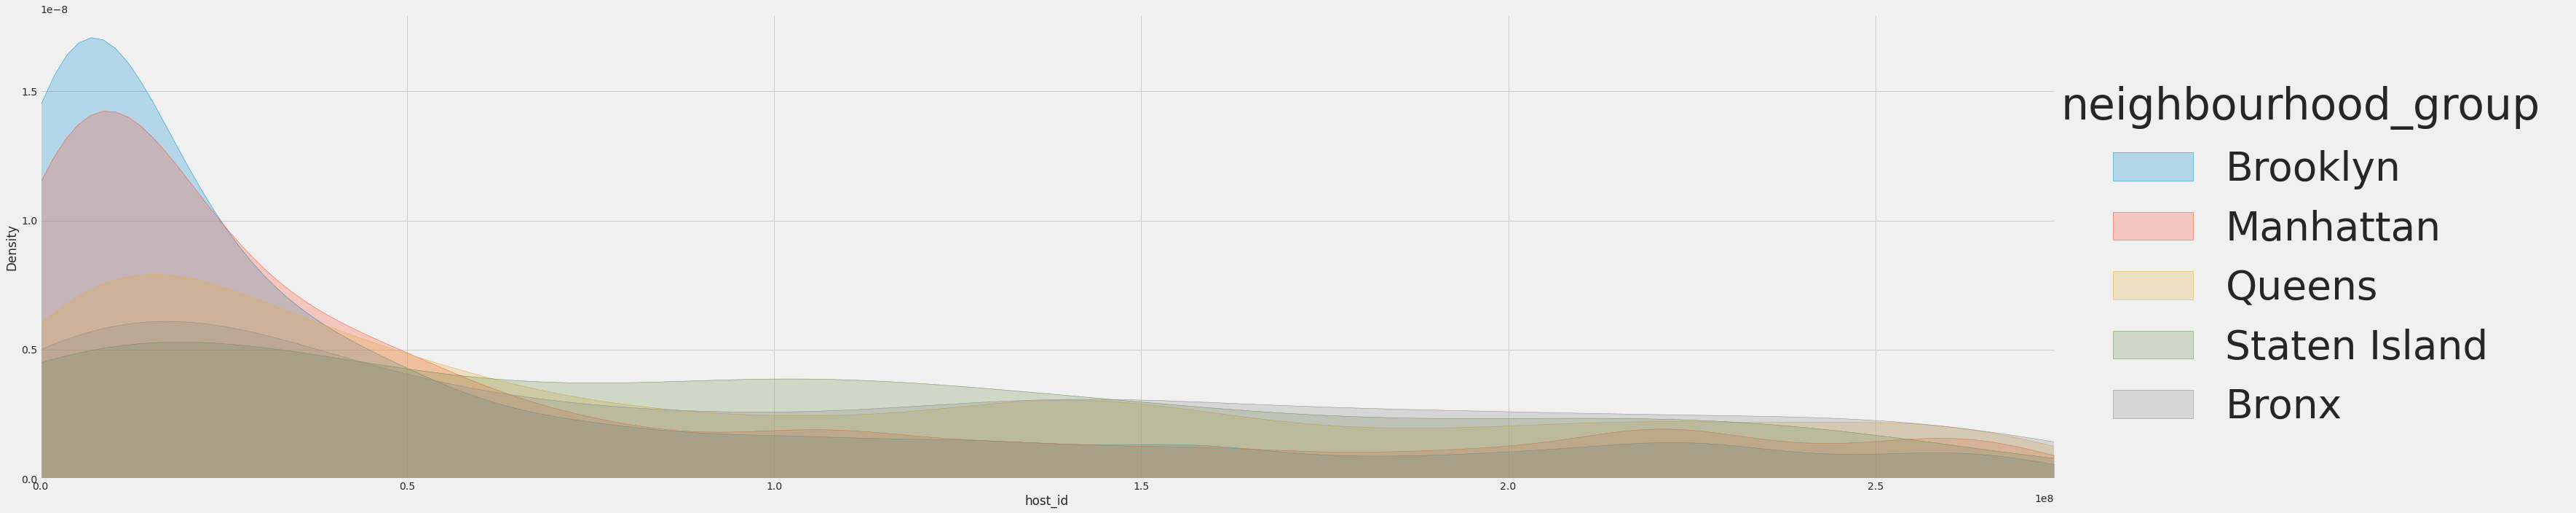

In [23]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(df, hue="neighbourhood_group", aspect=4, height=10)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = df['host_id'].max()
fig.set(xlim=(0, oldest))
sns.set(font_scale=5)
fig.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


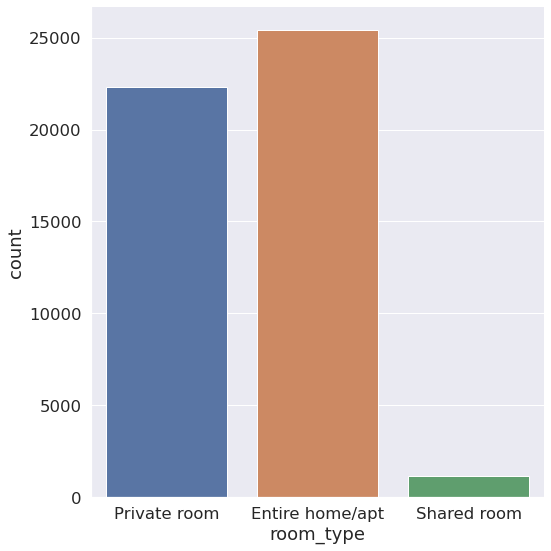

In [24]:
sns.set(font_scale=1.5)
sns.catplot("room_type", data=df, kind="count", height=8)

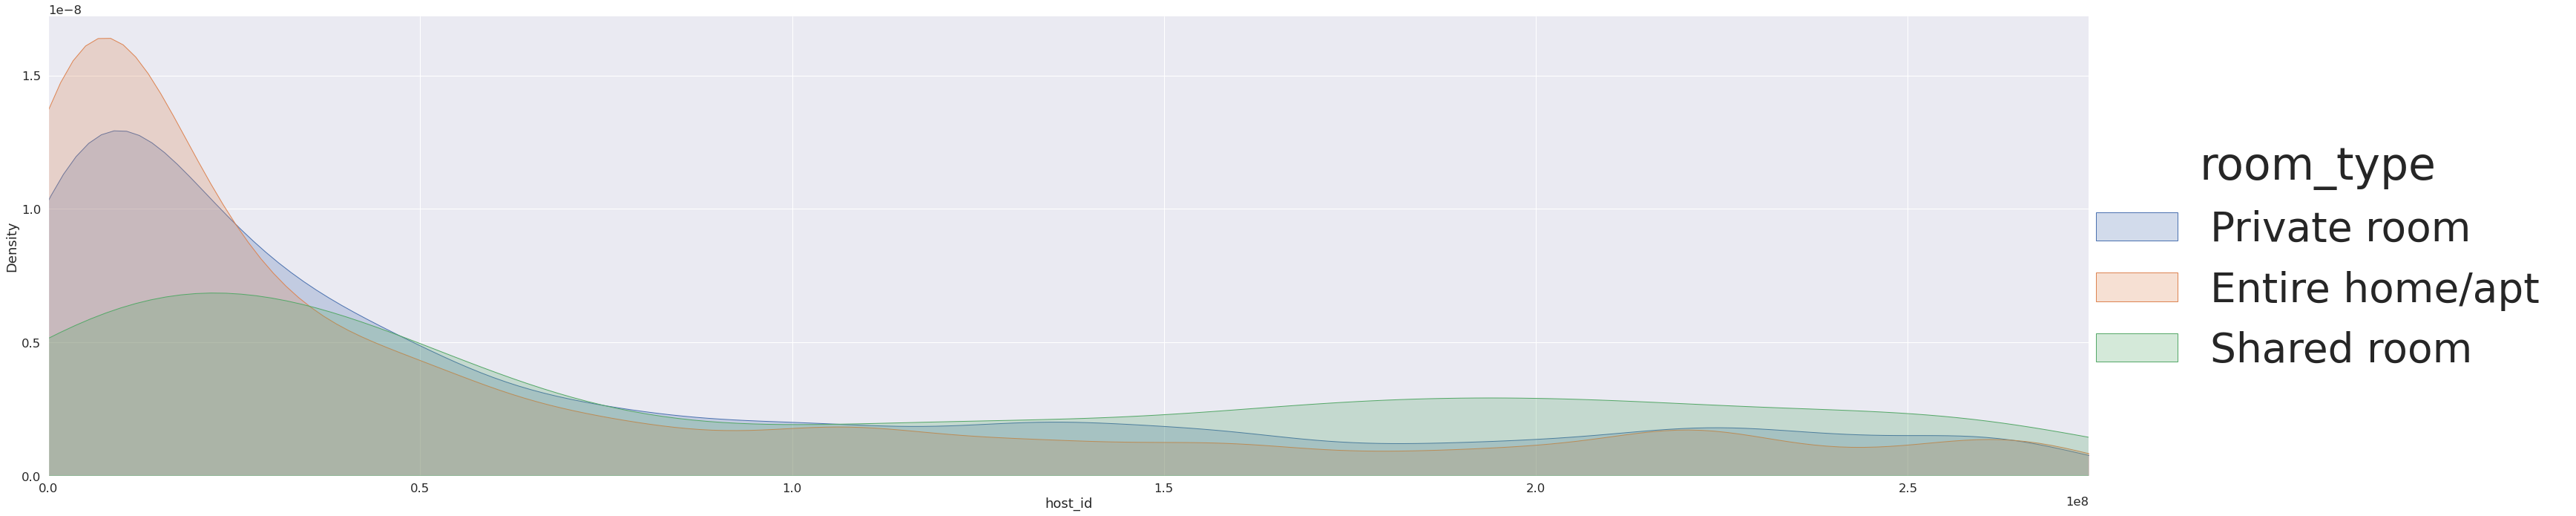

In [25]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(df, hue="room_type", aspect=4, height=10)
fig.map(sns.kdeplot, 'host_id', shade=True)
oldest = df['host_id'].max()
fig.set(xlim=(0, oldest))
sns.set(font_scale=5)
fig.add_legend()

<AxesSubplot:>

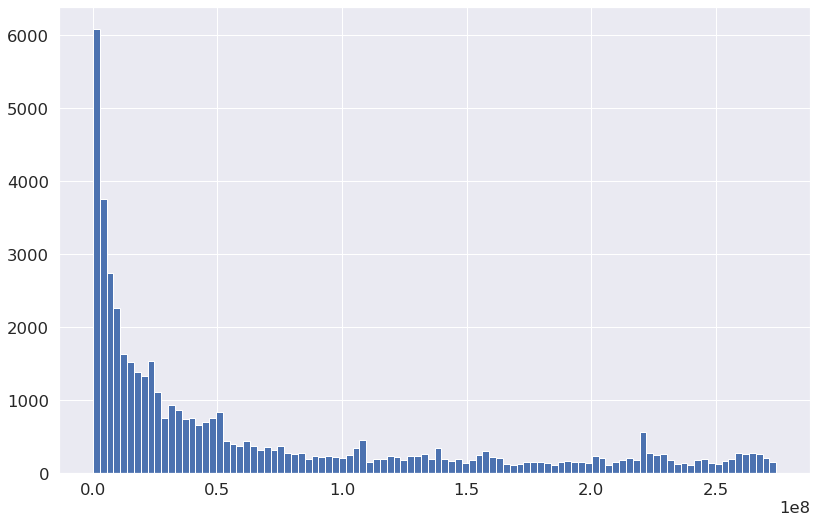

In [26]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12, 8))
df.host_id.hist(bins=100)

In [27]:
# df.neighbourhood.hist(bins=100)

<BarContainer object of 10 artists>

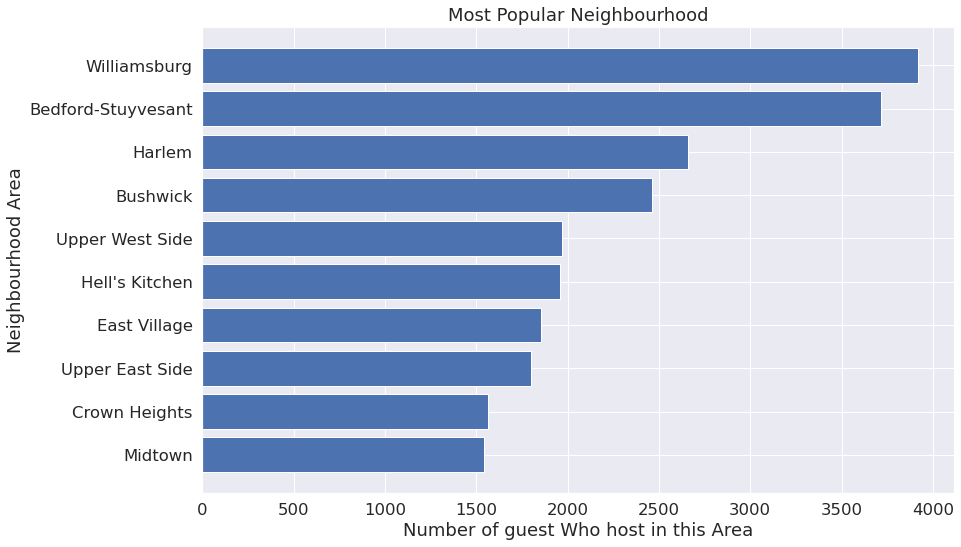

In [28]:
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

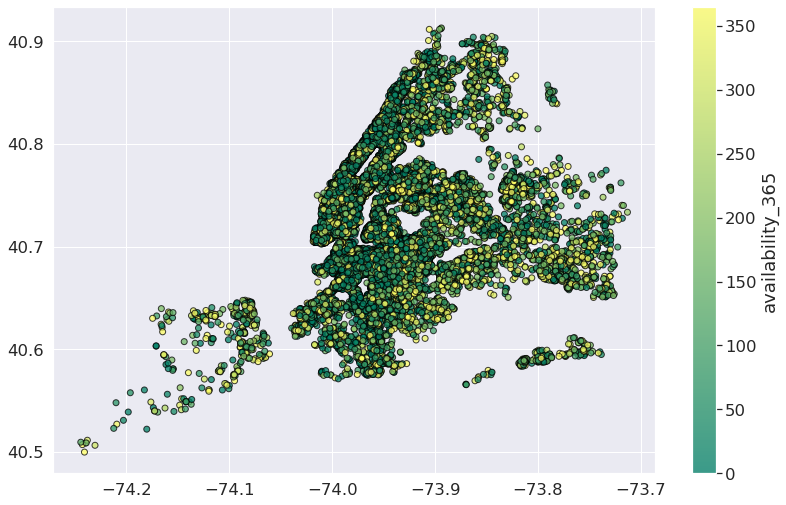

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

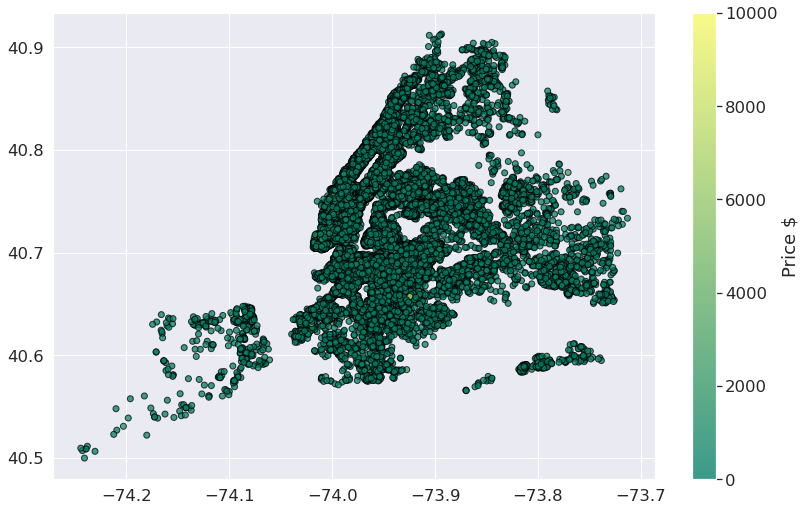

In [30]:
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.price, cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Price $')

In [31]:
print(f"Average of price per night : ${df.price.mean():.2f}")
print(f"Maximum price per night : ${df.price.max()}")
print(f"Minimum price per night : ${df.price.min()}")

Average of price per night : $152.72
Maximum price per night : $10000
Minimum price per night : $0


Wow there are some free houses

In [32]:
df[df.price == 0]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Brooklyn,Bedford-Stuyvesant,40.69,-73.95,Private room,0,4,1,2018-01-06,0.05,4,28
25433,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Bronx,East Morrisania,40.83,-73.89,Private room,0,2,55,2019-06-24,2.56,4,127
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Brooklyn,Bushwick,40.69,-73.92,Private room,0,2,16,2019-05-18,0.71,5,0
25753,"Sunny, Quiet Room in Greenpoint",1641537,Brooklyn,Greenpoint,40.72,-73.94,Private room,0,2,12,2017-10-27,0.53,2,0
25778,Modern apartment in the heart of Williamsburg,10132166,Brooklyn,Williamsburg,40.71,-73.95,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,Spacious comfortable master bedroom with nice ...,86327101,Brooklyn,Bedford-Stuyvesant,40.68,-73.91,Private room,0,1,93,2019-06-15,4.28,6,176
25795,Contemporary bedroom in brownstone with nice view,86327101,Brooklyn,Bedford-Stuyvesant,40.68,-73.91,Private room,0,1,95,2019-06-21,4.37,6,232
25796,Cozy yet spacious private brownstone bedroom,86327101,Brooklyn,Bedford-Stuyvesant,40.68,-73.91,Private room,0,1,95,2019-06-23,4.35,6,222
26259,the best you can find,13709292,Manhattan,Murray Hill,40.75,-73.98,Entire home/apt,0,3,0,2019-06-23,1.37,1,0
26841,Coliving in Brooklyn! Modern design / Shared room,101970559,Brooklyn,Bushwick,40.69,-73.91,Shared room,0,30,2,2019-06-22,0.11,6,333


<AxesSubplot:>

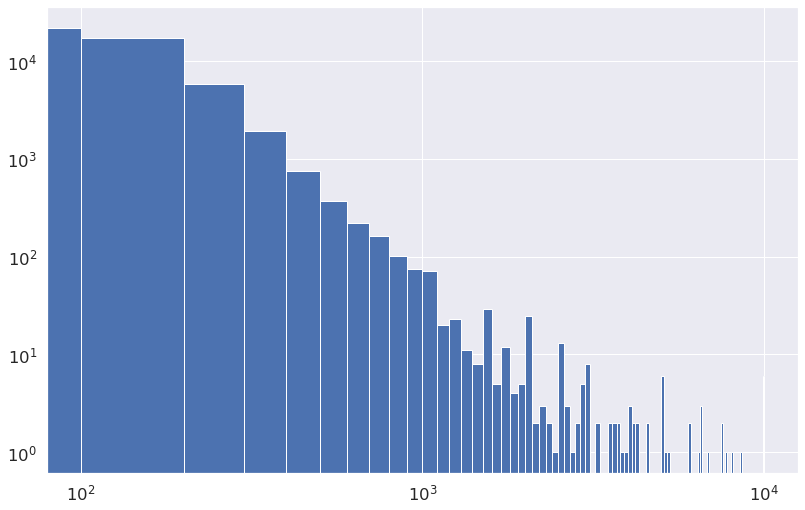

In [33]:
plt.figure(figsize=(12, 8))
plt.xscale('log')
plt.yscale('log')

df.price.hist(bins=100)

# 3. correlation matrix

<AxesSubplot:>

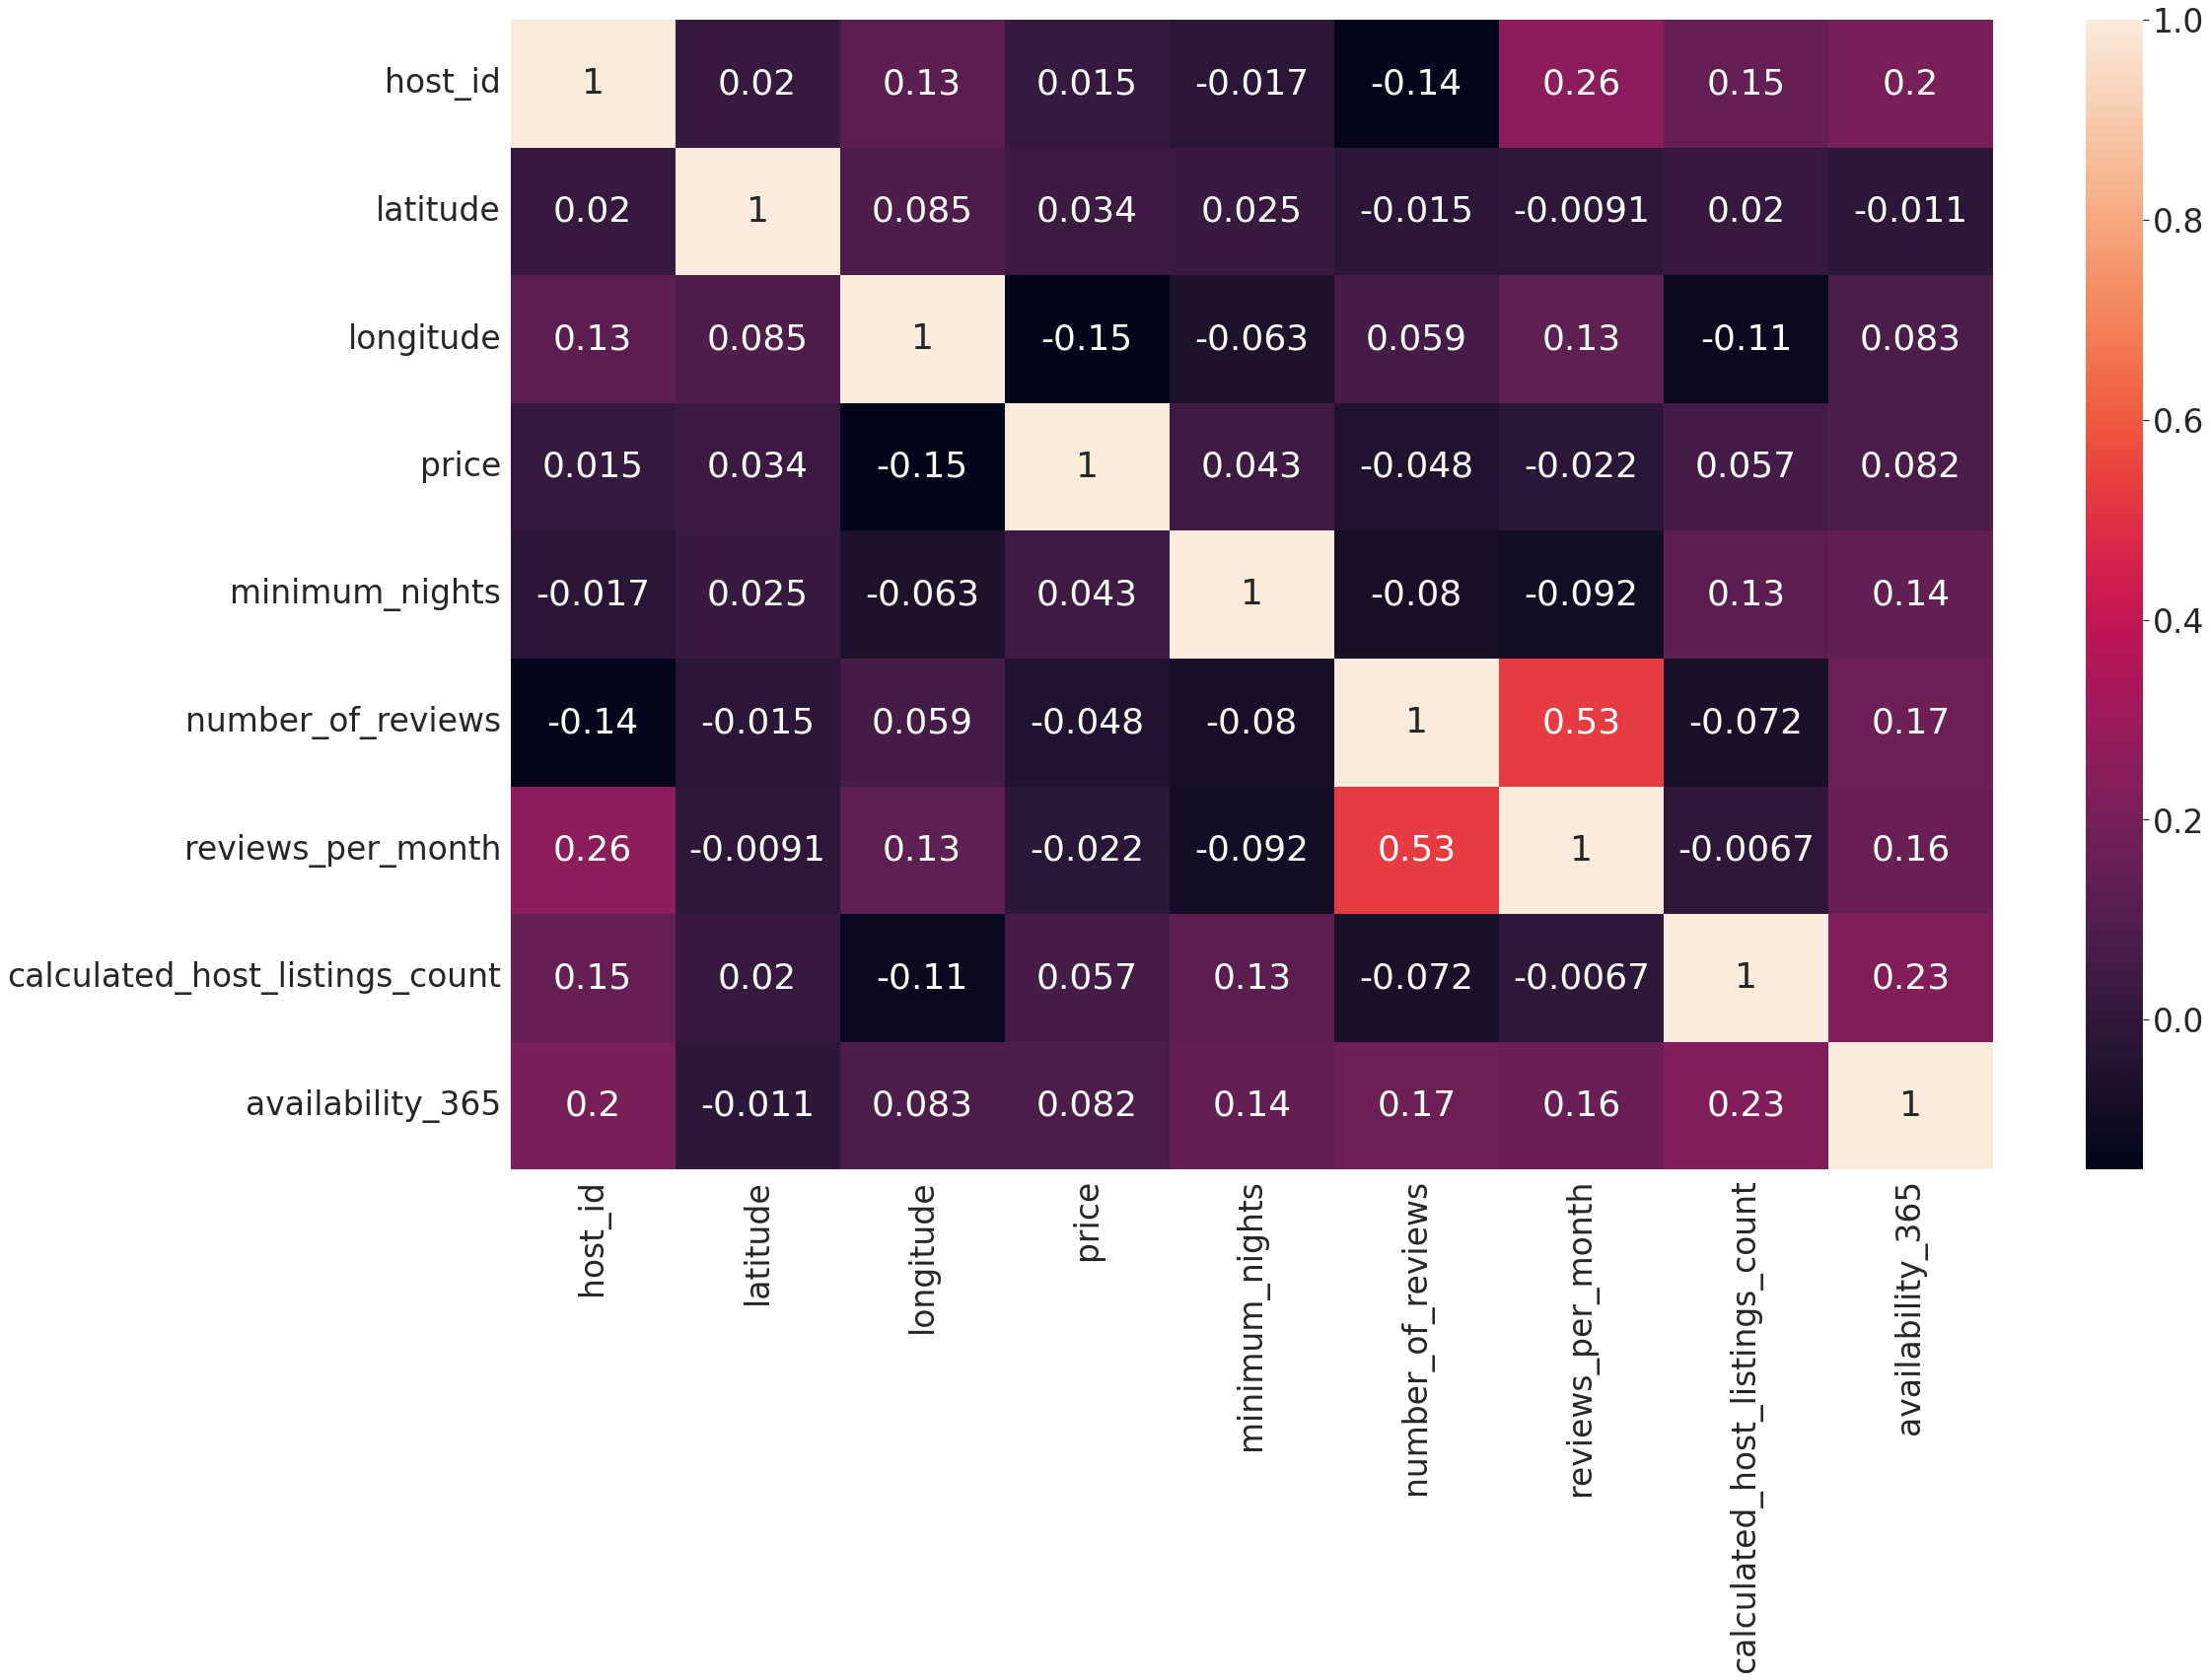

In [34]:
# correlation matrix
sns.set(font_scale=3)
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)

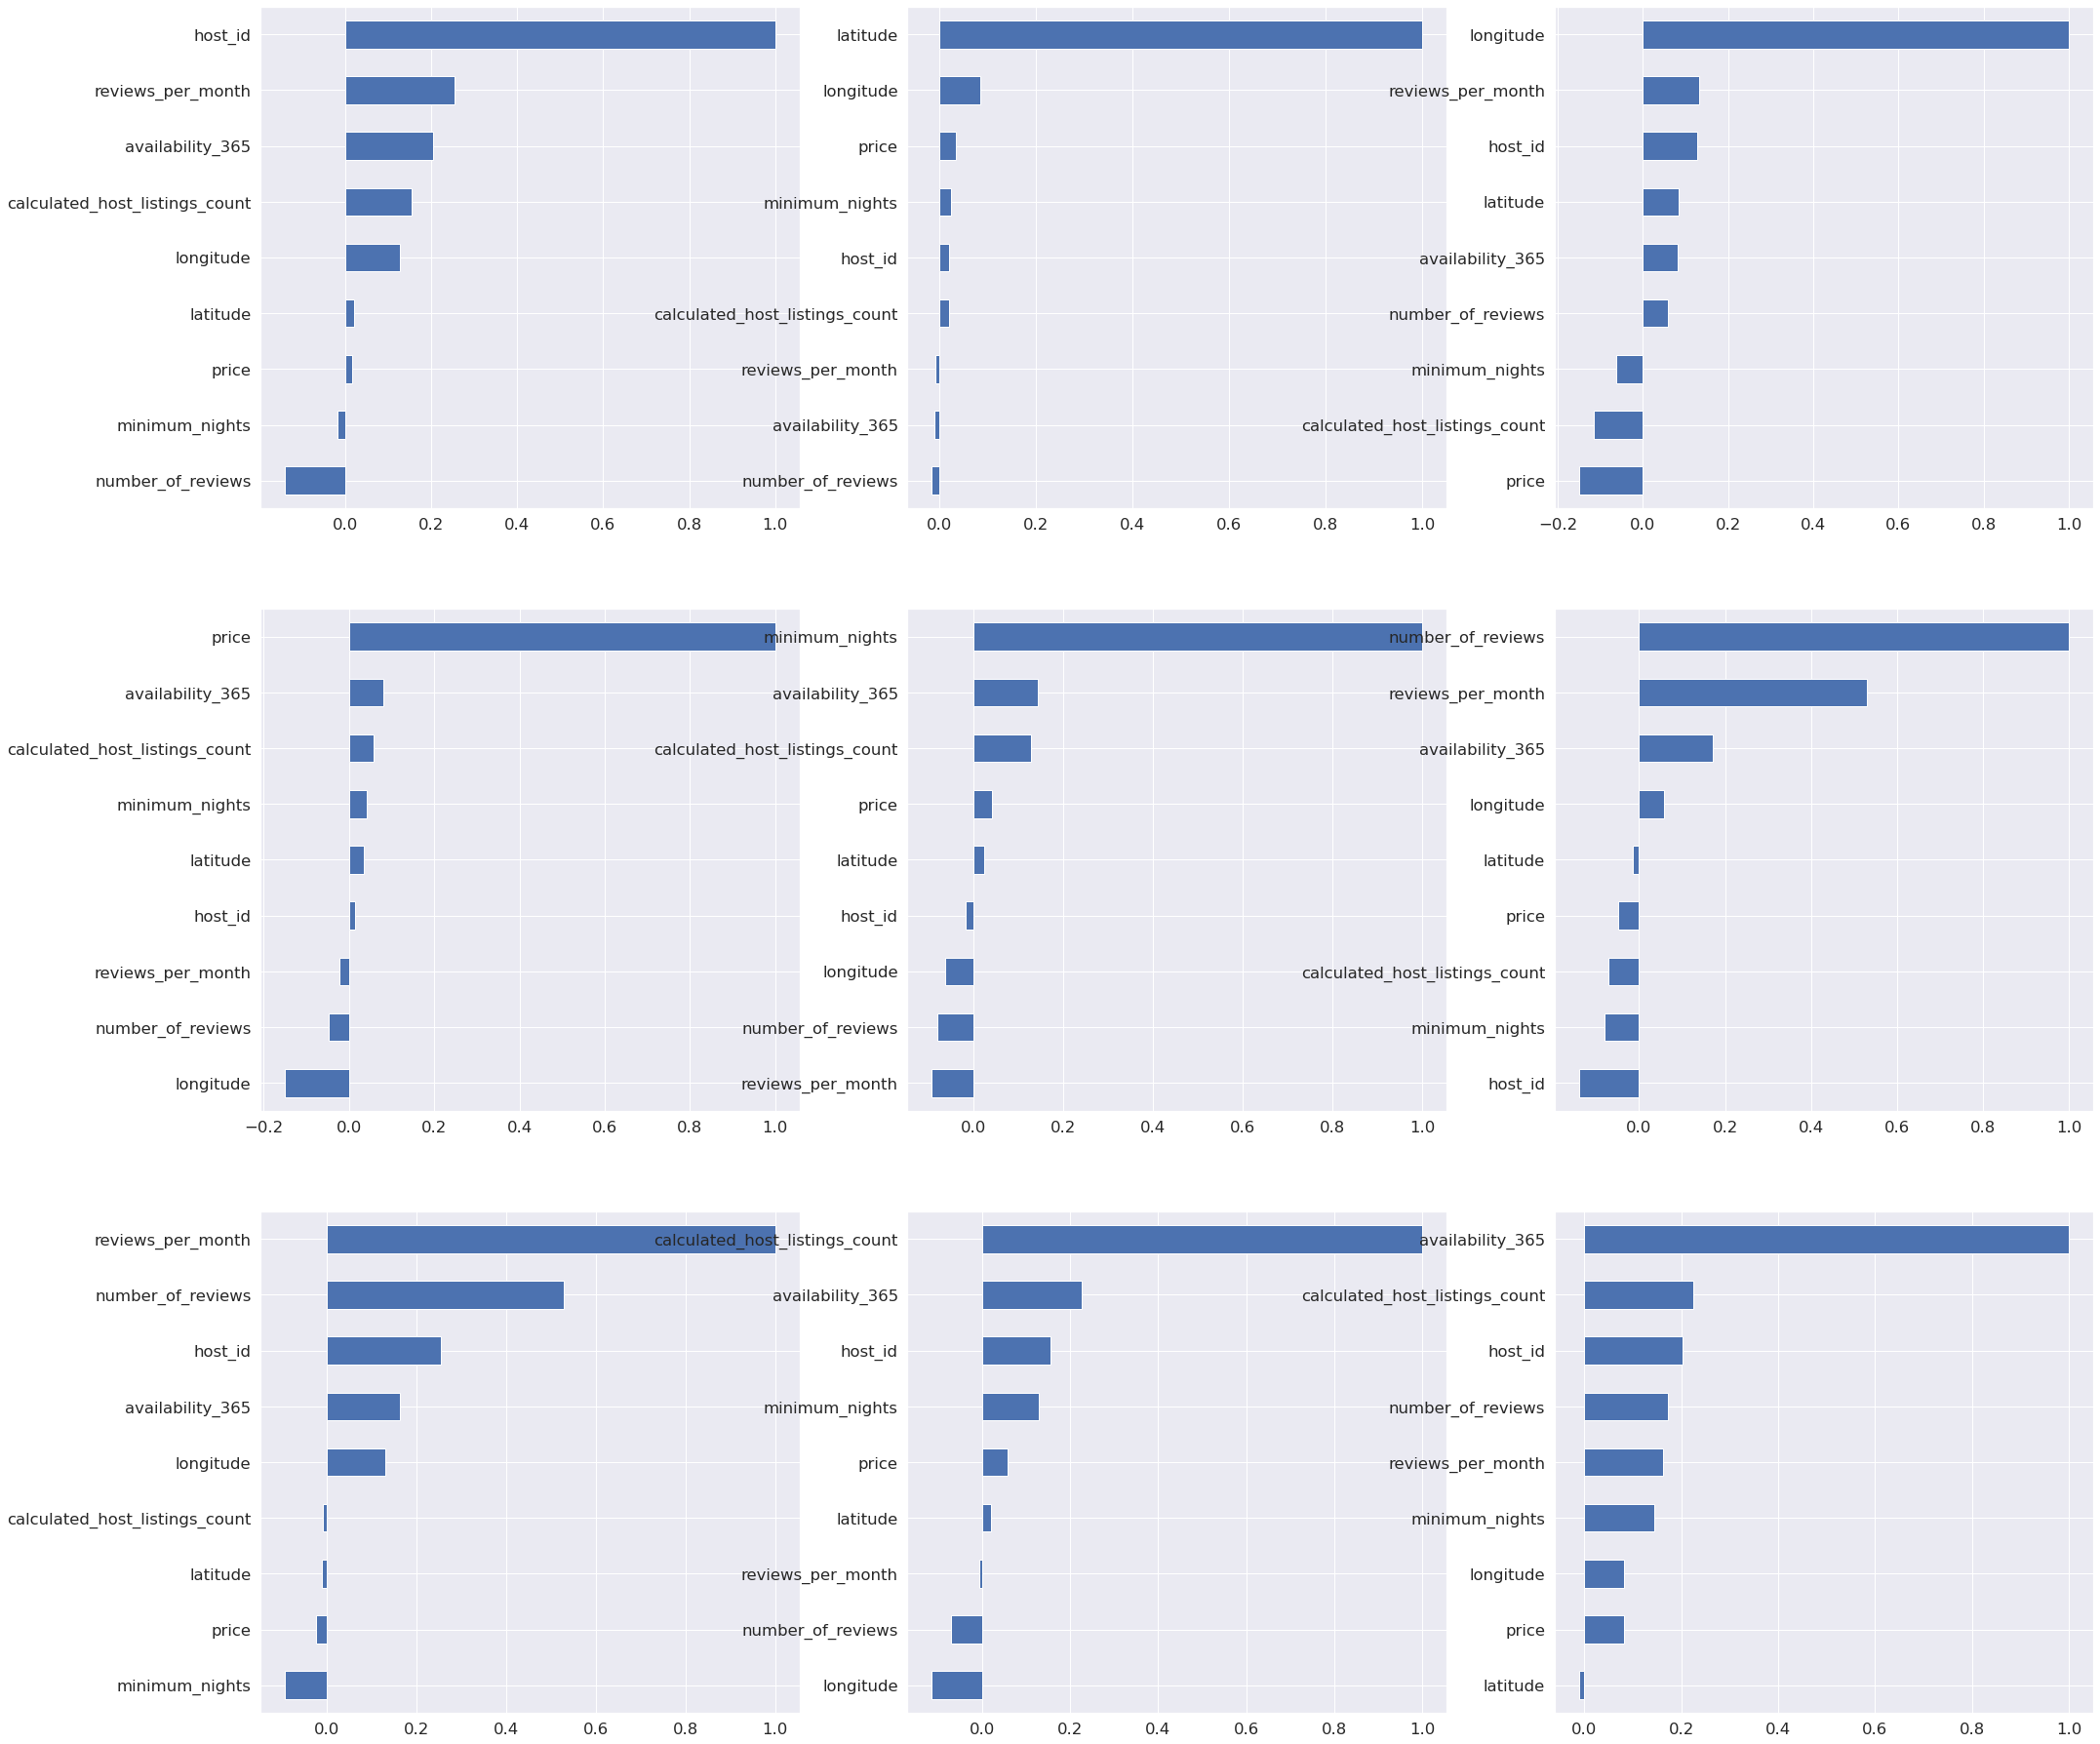

In [35]:
plt.figure(figsize=(30, 30))
sns.set(font_scale=1.5)
i = 1
for column in df.columns:
    if df[column].dtype == "float64" or df[column].dtype == "int64":
        plt.subplot(3, 3, i)
        df.corr()[column].sort_values().plot(kind="barh")
        i += 1

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

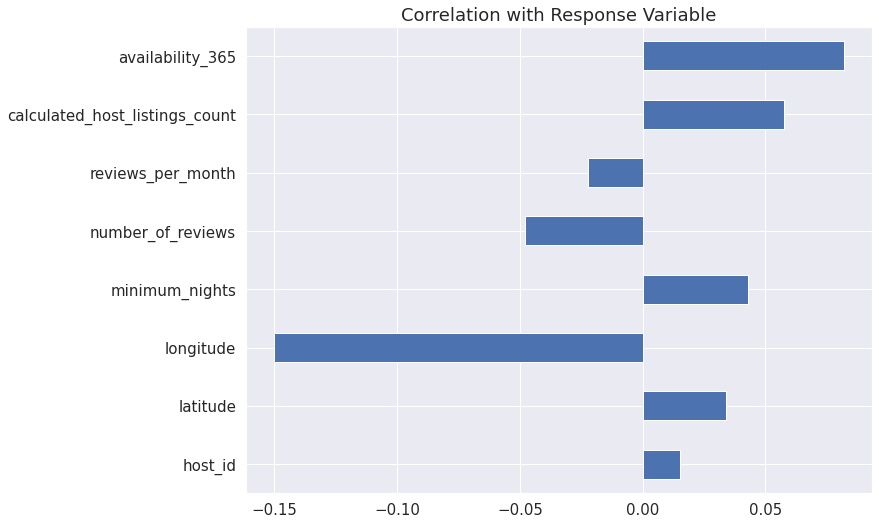

In [36]:
df.drop('price', axis=1).corrwith(df.price).plot.barh(figsize=(10, 8), 
                                                        title='Correlation with Response Variable',
                                                        fontsize=15, grid=True)

# 4. Handle categorical features

- Ordinal feature: (Ticket class 1-2-3, Driver's licence A- B -C,...)
    - Alphabetical (sorted): [B, A, C] ==> [2, 1, 3], sklearn.preprocessing.LabelEncoder
    - Order of apperance: [B, A, C] ==> [1, 2, 3], pandas.factorize
    - Frequency encoding: [B, A, C] ==> [0.5, 0.3, 0.2]
    - One-Hot Oncoding: pandas.get_dummies, sklearn.preprocessing.OneHotEncoder
- Values in ordinal features are sorted in some meaningful order.
- Label encoding maps categories to numbers.
- Frequency encoding maps categories to their frequencies.
- Label and Frequency encoding are often used for tree based models.
- One-Hot Encoding is often used for non-tree based models.
- Interaction of categorical features can help linear and KNN models

In [37]:
categorical_col

['neighbourhood_group', 'room_type']

In [38]:
dataset = pd.get_dummies(df, columns=categorical_col)
dataset.head()

,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,2787,Kensington,40.65,-73.97,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,0,0,1,0
1,Skylit Midtown Castle,2845,Midtown,40.75,-73.98,225,1,45,2019-05-21,0.38,2,355,0,0,1,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Harlem,40.81,-73.94,150,3,0,2019-05-21,1.37,1,365,0,0,1,0,0,0,1,0
3,Cozy Entire Floor of Brownstone,4869,Clinton Hill,40.69,-73.96,89,1,270,2019-07-05,4.64,1,194,0,1,0,0,0,1,0,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,East Harlem,40.80,-73.94,80,10,9,2018-11-19,0.10,1,0,0,0,1,0,0,1,0,0


In [39]:
print(df.columns)
print(dataset.columns)

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
Index(['name', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


In [40]:
print(dataset.describe().loc["mean", :])
print("====================================")
print(dataset.describe().loc["std", :])

host_id                             67620010.65
latitude                                  40.73
longitude                                -73.95
price                                    152.72
minimum_nights                             7.03
number_of_reviews                         23.27
reviews_per_month                          1.37
calculated_host_listings_count             7.14
availability_365                         112.78
neighbourhood_group_Bronx                  0.02
neighbourhood_group_Brooklyn               0.41
neighbourhood_group_Manhattan              0.44
neighbourhood_group_Queens                 0.12
neighbourhood_group_Staten Island          0.01
room_type_Entire home/apt                  0.52
room_type_Private room                     0.46
room_type_Shared room                      0.02
Name: mean, dtype: float64
host_id                             78610967.03
latitude                                   0.05
longitude                                  0.05
price        

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

col_to_scale = ['host_id', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']

s_sc = StandardScaler()
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

label = LabelEncoder()
dataset['neighbourhood'] = label.fit_transform(dataset['neighbourhood'])

In [42]:
print(dataset.describe().loc["mean", :])
print("====================================")
print(dataset.describe().loc["std", :])

host_id                               0.00
neighbourhood                       107.12
latitude                             40.73
longitude                           -73.95
price                               152.72
minimum_nights                        0.00
number_of_reviews                     0.00
reviews_per_month                     0.00
calculated_host_listings_count       -0.00
availability_365                      0.00
neighbourhood_group_Bronx             0.02
neighbourhood_group_Brooklyn          0.41
neighbourhood_group_Manhattan         0.44
neighbourhood_group_Queens            0.12
neighbourhood_group_Staten Island     0.01
room_type_Entire home/apt             0.52
room_type_Private room                0.46
room_type_Shared room                 0.02
Name: mean, dtype: float64
host_id                               1.00
neighbourhood                        68.74
latitude                              0.05
longitude                             0.05
price                      

In [43]:
# plt.figure(figsize=(20, 40))

# columns = list(dataset.drop(['name', 'host_id', 'price', 'last_review', 'neighbourhood_group', 'neighbourhood'], axis=1).columns)

# for i, column in enumerate(columns, 1):
#     plt.subplot(6, 3, i)
#     plt.scatter(df.longitude, df.latitude, c=df[column], cmap='summer', edgecolor='black', linewidth=1, alpha=0.75)

#     cbar = plt.colorbar()
#     cbar.set_label(column)

In [44]:
dataset.head()

,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,-0.86,108,40.65,-73.97,149,-0.29,-0.32,2018-10-19,-0.78,-0.03,1.92,0,1,0,0,0,0,1,0
1,Skylit Midtown Castle,-0.86,127,40.75,-73.98,225,-0.29,0.49,2019-05-21,-0.66,-0.16,1.84,0,0,1,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,-0.86,94,40.81,-73.94,150,-0.20,-0.52,2019-05-21,0.00,-0.19,1.92,0,0,1,0,0,0,1,0
3,Cozy Entire Floor of Brownstone,-0.86,41,40.69,-73.96,89,-0.29,5.54,2019-07-05,2.18,-0.19,0.62,0,1,0,0,0,1,0,0
4,Entire Apt: Spacious Studio/Loft by central park,-0.86,61,40.80,-73.94,80,0.14,-0.32,2018-11-19,-0.85,-0.19,-0.86,0,0,1,0,0,1,0,0


In [45]:
dataset.name.nunique()

47905

# 5. Model Building

In [46]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['name', 'price', 'last_review'], axis=1)
y = dataset.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [47]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [49]:
print_evaluate(y_test, lin_reg.predict(X_test))

MAE: 73.73368622216175
MSE: 47416.1142486008
RMSE: 217.75241502357855
R2 Square 0.1099244780248031


In [50]:
y.mean()

152.7206871868289